<a href="https://colab.research.google.com/github/schaeffer-thom/ML-projects/blob/main/inverse_kinematics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

import kagglehub

# Download latest version
path = kagglehub.dataset_download("sandibaressiegota/robot-kinematics-dataset")

print("Path to dataset files:", path)

data = pd.read_csv('/kaggle/input/robot-kinematics-dataset/robot_inverse_kinematics_dataset.csv')

y = data.drop(columns=['x','y','z'])
x = data[['x','y','z']]


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(data.info())
data.head()



Path to dataset files: /kaggle/input/robot-kinematics-dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   q1      15000 non-null  float64
 1   q2      15000 non-null  float64
 2   q3      15000 non-null  float64
 3   q4      15000 non-null  float64
 4   q5      15000 non-null  float64
 5   q6      15000 non-null  float64
 6   x       15000 non-null  float64
 7   y       15000 non-null  float64
 8   z       15000 non-null  float64
dtypes: float64(9)
memory usage: 1.0 MB
None


,q1,q2,q3,q4,q5,q6,x,y,z
0,-1.51,-0.763,1.85,-0.817,0.9120,2.320,-0.0947,0.1500,0.301
1,-2.84,0.520,1.58,-1.270,-1.3900,0.617,0.1420,-0.1000,0.225
2,-1.23,0.695,1.22,-1.130,0.0343,6.270,-0.0833,0.2230,0.206
3,-1.99,1.060,1.74,-1.760,-1.2400,4.760,0.1350,-0.0314,0.370
4,1.05,0.836,1.34,-1.890,0.4840,4.380,-0.0560,-0.2290,0.260


In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [12]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.4f}')


Mean Absolute Error: 1.0587


In [15]:

import numpy as np

new_position = np.array([[0.3, 0.2, 0.5]])  # Example XYZ position
predicted_angles = model.predict(new_position)

print(f'Predicted Joint Angles: {predicted_angles[0]}')



Predicted Joint Angles: [-2.22179    1.65889    1.3263    -0.2326468 -0.470402   4.18474  ]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


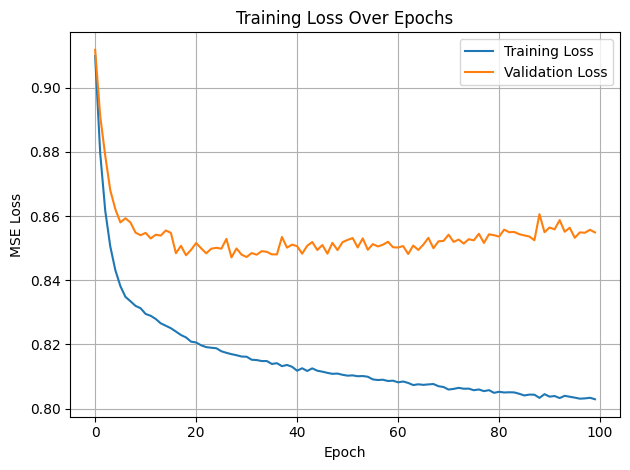

In [18]:
# Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(x_train)
X_test = scaler_X.transform(x_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Build the model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(3,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(6)  # 6 joint angles output
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.tight_layout()
plt.show()